# HomeWork2

https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/02-regression/homework.md

## import modules

In [243]:
import numpy as np
import pandas as pd

In [244]:
# get data
# https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [245]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-18 18:06:14--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1,4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1,36M   123KB/s    in 9,0s    

2022-09-18 18:06:24 (154 KB/s) - ‘housing.csv.1’ saved [1423529/1423529]



In [246]:
df = pd.read_csv('housing.csv')

In [247]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [248]:
df.shape

(20640, 10)

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

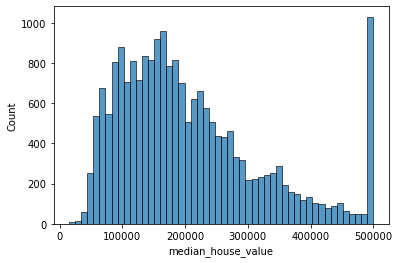

In [250]:
sns.histplot(df.median_house_value, bins=50)

In [251]:
data_columns = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value']

In [252]:
df = df[data_columns]

In [253]:
# question  1
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [254]:
# question 2
df.population.median()

1166.0

splitting the data:

    Shuffle the initial dataset, use seed 42.
    Split your data in train/val/test sets, with 60%/20%/20% distribution.
    Make sure that the target value ('median_house_value') is not in your dataframe.
    Apply the log transformation to the median_house_value variable using the np.log1p() function.


In [255]:
n = len(df)
index = np.arange(n)
np.random.seed(42)
np.random.shuffle(index)

In [256]:
n_train = int(n*0.6)
n_val = int(n*0.2)
n_test = n - n_train - n_val
n, n_train, n_val, n_test

(20640, 12384, 4128, 4128)

In [257]:
df_train = df.iloc[index[:n_train]]
df_val = df.iloc[index[n_train: n_train + n_val]]
df_test = df.iloc[index[n_train + n_val:]]

In [258]:
y_train = df_train.median_house_value
y_val = df_val.median_house_value
y_test = df_test.median_house_value

In [259]:
df_train.shape, df_val.shape, df_test.shape

((12384, 9), (4128, 9), (4128, 9))

In [260]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [261]:
df_train.shape, df_val.shape, df_test.shape

((12384, 8), (4128, 8), (4128, 8))

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

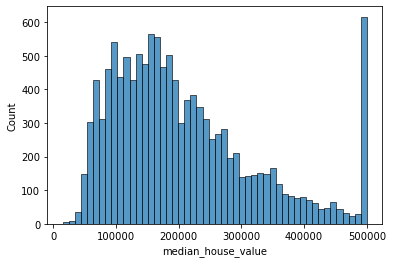

In [262]:
sns.histplot(y_train, bins=50)

In [263]:
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
y_test_log = np.log1p(y_test)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

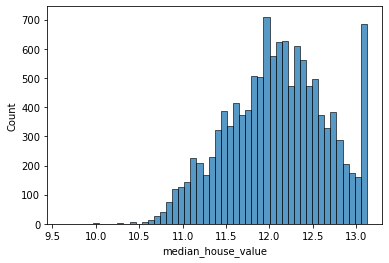

In [264]:
sns.histplot(y_train_log, bins=50)

In [265]:
# question 3

In [266]:
data_columns_m = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income']

In [267]:
def mrse(y_val, y):
    se = y_val - y
    sse = se ** 2
    mse = sse.mean()
    return(np.sqrt(mse))

In [268]:
def prepare_x_values(df, columns_name, fill_zeros_value):
    df = df.copy()

    df_num = df[columns_name]
    df_num = df_num.fillna(fill_zeros_value)
    X = df_num.values
    return X

In [269]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return(w_full[0], w_full[1:])

In [270]:
X_train_1 = prepare_x_values(df_train, data_columns_m, 0)
X_val_1 = prepare_x_values(df_val, data_columns_m, 0)

In [271]:
w0, w = train_linear_regression(X_train_1, y_train_log)

In [272]:
w0, w

(-11.686975241966877,
 array([-2.82087184e-01, -2.76255120e-01,  2.91329621e-03, -8.64531514e-06,
         1.50811922e-04, -2.08205659e-04,  5.69546573e-04,  1.71308139e-01]))

In [273]:
y_pred = w0 + X_val_1.dot(w)
round(mrse(y_pred, y_val_log), 4)

0.3295

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

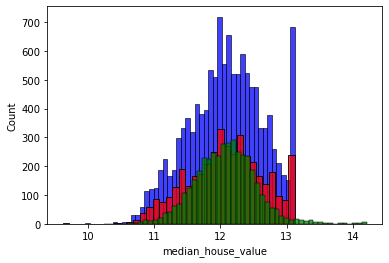

In [274]:
sns.histplot(y_train_log, color = 'blue')
sns.histplot(y_val_log, color = 'red')
sns.histplot(y_pred, color = 'green')

In [275]:
df_train.total_bedrooms.mean()

533.4803317730147

In [276]:
X_train_2 = prepare_x_values(df_train, data_columns_m, 533)
X_val_2 = prepare_x_values(df_val, data_columns_m, 0)
w0, w = train_linear_regression(X_train_2, y_train_log)
y_pred = w0 + X_val_2.dot(w)
round(mrse(y_pred, y_val_log), 4)

0.329

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

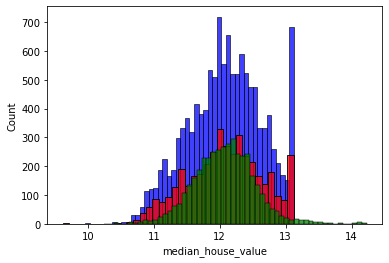

In [277]:
sns.histplot(y_train_log, color = 'blue')
sns.histplot(y_val_log, color = 'red')
sns.histplot(y_pred, color = 'green')

In [278]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX += r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return(w_full[0], w_full[1:])

In [279]:
X_train = prepare_x_values(df_train, data_columns_m, 0)
X_val = prepare_x_values(df_val, data_columns_m, 0)
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train_log, r)
    y_pred = w0 + X_val_2.dot(w)
    mrserror = mrse(y_pred, y_val_log)
    print(r, w0, round(mrserror,2))

0 -11.686975241966877 0.33
1e-06 -11.686959175914195 0.33
0.0001 -11.685368865172869 0.33
0.001 -11.670931318186463 0.33
0.01 -11.52849358554413 0.33
0.1 -10.274500281959998 0.33
1 -4.920480897735361 0.33
5 -1.4820957456410375 0.34
10 -0.7899311832121201 0.34


In [280]:
# question 5

In [281]:
data_columns_m = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income']

In [282]:
def generate_datasets(df, seed):
    n = len(df)
    index = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(index)

    n_train = int(n*0.6)
    n_val = int(n*0.2)
    n_test = n - n_train - n_val
    n, n_train, n_val, n_test

    df_train = df.iloc[index[:n_train]]
    df_val = df.iloc[index[n_train: n_train + n_val]]
    df_test = df.iloc[index[n_train + n_val:]]

    y_train = df_train.median_house_value
    y_val = df_val.median_house_value
    y_test = df_test.median_house_value
    
    return(df_train, y_train, df_val, y_val, df_test, y_test)

In [283]:
def train_and_evaluate_model(df_x_tr, df_x_val, data_columns, y_tr, y_val, fil_if_na = 0):
    X_train = prepare_x_values(df_x_tr, data_columns, fil_if_na)
    X_val = prepare_x_values(df_x_val, data_columns, 0)
    w0, w = train_linear_regression(X_train, np.log1p(y_tr))
    y_pred = w0 + X_val.dot(w)
    mrserror = mrse(y_pred, np.log1p(y_val))
    return(mrserror)

In [284]:
rmse_scores = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, y_train, df_val, y_val, df_test, y_test = generate_datasets(df, seed)
    del df_train['median_house_value']
    score = train_and_evaluate_model(df_train, df_val, data_columns_m, y_train, y_val, fil_if_na = 0)
    print(seed, score)
    rmse_scores.append(score)
    
    

0 0.33884304805313953
1 0.3362387255955907
2 0.3320912318835943
3 0.34051536090378665
4 0.33890240665729654
5 0.3434866725719505
6 0.3451980953099508
7 0.3395989927411364
8 0.34662308731767183
9 0.3365926124189891


In [285]:
np.std(rmse_scores)

0.0041707719464643255

In [286]:
round(np.std(rmse_scores),3)

0.004

In [287]:
# question 6

In [288]:
df_train, y_train, df_val, y_val, df_test, y_test = generate_datasets(df, seed)

In [289]:
df_full_train = pd.concat([df_train, df_val])

In [290]:
y_full_train = np.concatenate([y_train, y_val])

In [291]:
X_full_train = prepare_x_values(df_full_train, data_columns_m, 0)
w0, w = train_linear_regression_reg(X_full_train, np.log1p(y_full_train), 0.001)
print(w0, w)

X_test = prepare_x_values(df_test, data_columns_m, 0)
X_test.shape
y_pred = w0 + X_test.dot(w)
mrserror = mrse(y_pred, np.log1p(y_test))

print(np.round(mrserror, 2))

-11.407983343868523 [-2.76748454e-01 -2.71992083e-01  3.36619692e-03 -2.14014248e-05
  2.47085669e-04 -1.72981187e-04  4.51800359e-04  1.76299970e-01]
0.35
